<a href="https://colab.research.google.com/github/Max-JI64/Today-I-Learn/blob/main/Study/Image_Processing_Bible/3_2_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2.1 이미지 분류

## 이미지 분류를 위한 데이터 전처리

### 모듈 불러오기

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### 데이터 불러오기

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### 데이터 확인하기

In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


|0|1|2|3|4|5|6|7|8|9|  
|---|---|---|---|---|---|---|---|---|---|  
|비행기|자동차|새|고양이|사슴|개|개구리|말|배|트럭

### 데이터 정규화

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
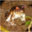

In [4]:
train_images[0]

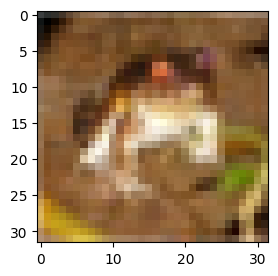

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])

데이터 정규화

In [6]:
train_images = train_images/255
test_images = test_images/255

### 데이터 분할

In [7]:
val_images = train_images[45000:]
val_labels = train_labels[45000:]

train_images = train_images[:45000]
train_labels = train_labels[:45000]

## 다층 퍼셉트론을 활용한 이미지 분류

### 모델 생성하기

In [8]:
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)), #펼치기
    Dense(512, activation="relu"), #은닉층
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax") #분류
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일하기

In [10]:
mlp_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### 모델 훈련하기

In [11]:
mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2627 - loss: 2.0145 - val_accuracy: 0.3548 - val_loss: 1.7816
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3762 - loss: 1.7202 - val_accuracy: 0.4060 - val_loss: 1.6730
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4126 - loss: 1.6256 - val_accuracy: 0.4352 - val_loss: 1.5866
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4417 - loss: 1.5686 - val_accuracy: 0.4474 - val_loss: 1.5548
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4619 - loss: 1.5067 - val_accuracy: 0.4282 - val_loss: 1.5969


### 모델 평가하기

In [12]:
mlp_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4361 - loss: 1.5696


[1.5611371994018555, 0.4415999948978424]

## 합성곱 신경망을 활용한 이미지 분류

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [14]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일하기

In [16]:
cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

### 콜백 정의하기

모델 학습 후 성능 평가, 모델 저장

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [18]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5)
save_best_only = ModelCheckpoint("best_cifar10_cnn_model.h5", save_best_only=True)

### 모델 학습하기

In [19]:
history = cnn_model.fit(train_images, train_labels, batch_size=512, epochs=100,
                        validation_data=(val_images, val_labels),
                        callbacks=[early_stopping, save_best_only] #여러개의 콜백을 인수로 넘겨주기
                        )

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2226 - loss: 2.1012

88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.2234 - loss: 2.0995 - val_accuracy: 0.4448 - val_loss: 1.5971
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3976 - loss: 1.6772

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3977 - loss: 1.6767 - val_accuracy: 0.5114 - val_loss: 1.3871
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4546 - loss: 1.5042

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4547 - loss: 1.5040 - val_accuracy: 0.5334 - val_loss: 1.3353
Epoch 4/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4962 - loss: 1.4103

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4962 - loss: 1.4100 - val_accuracy: 0.5760 - val_loss: 1.2040
Epoch 5/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5194 - loss: 1.3363

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5196 - loss: 1.3360 - val_accuracy: 0.6034 - val_loss: 1.1271
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5477 - loss: 1.2772

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5477 - loss: 1.2771 - val_accuracy: 0.6346 - val_loss: 1.0608
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5663 - loss: 1.2235

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5663 - loss: 1.2234 - val_accuracy: 0.6322 - val_loss: 1.0448
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5770 - loss: 1.1865

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5770 - loss: 1.1864 - val_accuracy: 0.6402 - val_loss: 1.0178
Epoch 9/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5941 - loss: 1.1458

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5942 - loss: 1.1457 - val_accuracy: 0.6700 - val_loss: 0.9523
Epoch 10/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6115 - loss: 1.1014

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6115 - loss: 1.1013 - val_accuracy: 0.6870 - val_loss: 0.9155
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6238 - loss: 1.0712

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6238 - loss: 1.0712 - val_accuracy: 0.6802 - val_loss: 0.9149
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6280 - loss: 1.0603

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6280 - loss: 1.0601 - val_accuracy: 0.6882 - val_loss: 0.8956
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6382 - loss: 1.0307

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6383 - loss: 1.0306 - val_accuracy: 0.7008 - val_loss: 0.8577
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6551 - loss: 0.9880

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6551 - loss: 0.9881 - val_accuracy: 0.7134 - val_loss: 0.8479
Epoch 15/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6582 - loss: 0.9731

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6582 - loss: 0.9731 - val_accuracy: 0.7080 - val_loss: 0.8381
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6646 - loss: 0.9525

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6646 - loss: 0.9525 - val_accuracy: 0.7158 - val_loss: 0.8207
Epoch 17/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6745 - loss: 0.9296

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6745 - loss: 0.9296 - val_accuracy: 0.7202 - val_loss: 0.8089
Epoch 18/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6745 - loss: 0.9275

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6746 - loss: 0.9274 - val_accuracy: 0.7202 - val_loss: 0.7960
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6834 - loss: 0.8969

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6834 - loss: 0.8968 - val_accuracy: 0.7298 - val_loss: 0.7745
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6980 - loss: 0.8683 - val_accuracy: 0.7334 - val_loss: 0.7825
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6951 - loss: 0.8684

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6951 - loss: 0.8684 - val_accuracy: 0.7368 - val_loss: 0.7553
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7064 - loss: 0.8356

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7064 - loss: 0.8356 - val_accuracy: 0.7458 - val_loss: 0.7406
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7148 - loss: 0.8231 - val_accuracy: 0.7346 - val_loss: 0.7524
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7129 - loss: 0.8138

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7129 - loss: 0.8138 - val_accuracy: 0.7464 - val_loss: 0.7291
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7148 - loss: 0.8070

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7148 - loss: 0.8070 - val_accuracy: 0.7520 - val_loss: 0.7215
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7225 - loss: 0.7912

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7225 - loss: 0.7913 - val_accuracy: 0.7542 - val_loss: 0.7133
Epoch 27/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7244 - loss: 0.7835

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7244 - loss: 0.7835 - val_accuracy: 0.7530 - val_loss: 0.7086
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7294 - loss: 0.7719

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7294 - loss: 0.7719 - val_accuracy: 0.7538 - val_loss: 0.7041
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7355 - loss: 0.7500

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7355 - loss: 0.7501 - val_accuracy: 0.7502 - val_loss: 0.7040
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7322 - loss: 0.7540 - val_accuracy: 0.7506 - val_loss: 0.7115
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7423 - loss: 0.7395

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7423 - loss: 0.7395 - val_accuracy: 0.7544 - val_loss: 0.7034
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7451 - loss: 0.7306

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7451 - loss: 0.7306 - val_accuracy: 0.7636 - val_loss: 0.6851
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7490 - loss: 0.7069 - val_accuracy: 0.7598 - val_loss: 0.6945
Epoch 34/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7533 - loss: 0.7030

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7533 - loss: 0.7031 - val_accuracy: 0.7688 - val_loss: 0.6769
Epoch 35/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7515 - loss: 0.6985 - val_accuracy: 0.7596 - val_loss: 0.6889
Epoch 36/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7583 - loss: 0.6932 - val_accuracy: 0.7594 - val_loss: 0.6845
Epoch 37/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7621 - loss: 0.6773

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7620 - loss: 0.6774 - val_accuracy: 0.7658 - val_loss: 0.6758
Epoch 38/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7632 - loss: 0.6640 - val_accuracy: 0.7582 - val_loss: 0.6841
Epoch 39/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7638 - loss: 0.6579 - val_accuracy: 0.7542 - val_loss: 0.7188
Epoch 40/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7656 - loss: 0.6527 - val_accuracy: 0.7638 - val_loss: 0.6793
Epoch 41/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7692 - loss: 0.6472 - val_accuracy: 0.7634 - val_loss: 0.6833
Epoch 42/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7753 - loss: 0.6347

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7753 - loss: 0.6348 - val_accuracy: 0.7666 - val_loss: 0.6731
Epoch 43/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7768 - loss: 0.6214 - val_accuracy: 0.7662 - val_loss: 0.6829
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7863 - loss: 0.6125

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7862 - loss: 0.6126 - val_accuracy: 0.7682 - val_loss: 0.6713
Epoch 45/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7827 - loss: 0.6137 - val_accuracy: 0.7572 - val_loss: 0.6824
Epoch 46/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7842 - loss: 0.6079

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7842 - loss: 0.6080 - val_accuracy: 0.7740 - val_loss: 0.6609
Epoch 47/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7836 - loss: 0.6034 - val_accuracy: 0.7646 - val_loss: 0.6879
Epoch 48/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7852 - loss: 0.6007 - val_accuracy: 0.7688 - val_loss: 0.6758
Epoch 49/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7889 - loss: 0.5823 - val_accuracy: 0.7706 - val_loss: 0.6853
Epoch 50/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7871 - loss: 0.5889 - val_accuracy: 0.7682 - val_loss: 0.6714
Epoch 51/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7956 - loss: 0.5736 - val_accuracy: 0.7716 - val_loss: 0.6760


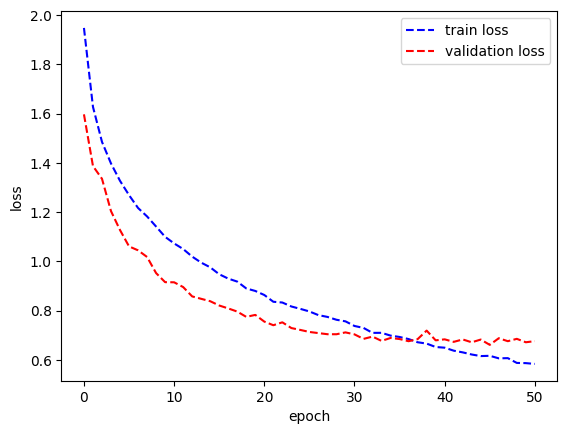

In [20]:
plt.plot(history.history["loss"], "b--")
plt.plot(history.history["val_loss"], "r--")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train loss", "validation loss"])
plt.show()

### 모델 평가하기

In [21]:
cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7671 - loss: 0.7086


[0.7195146679878235, 0.762499988079071]

### 예측 결과 시각화

In [22]:
predicted_labels=cnn_model.predict(test_images)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

각 레이블에 대해 10개의 클래스에 대한 확률 반환  
가장 큰 값을 뽑아 예측 레이블로 사용

In [23]:
import tensorflow as tf

In [24]:
predicted_labels = tf.argmax(predicted_labels, axis=1)
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 4, 7])>

In [25]:
label_to_name = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}


<function matplotlib.pyplot.show(close=None, block=None)>

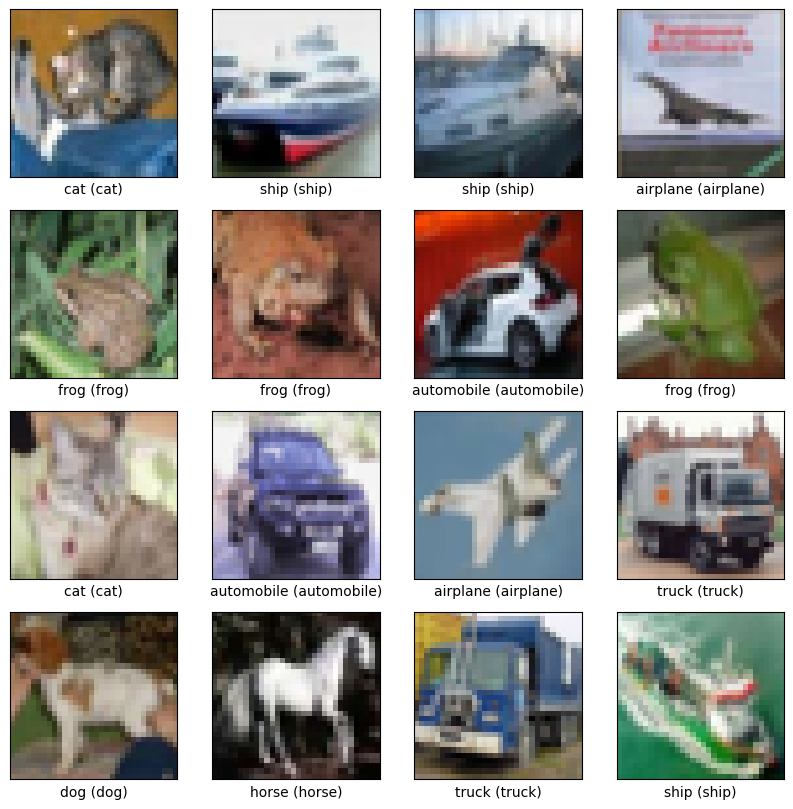

In [33]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"
    plt.xlabel(xlabel, color="red" if test_labels[i][0] != predicted_labels[i] else "black")
plt.show

# 3.2.2 객체 인식

## 하르 캐스케이드  
매우 복잡하고 다양한 이미지 데이터에서 얼굴과 같은 객체를 빠르게 탐지

### 특징 추출  
이미지는 픽셀의 그리드로 구성, 각 픽셀은 색상 및 강도 정보를 포함  
하르 캐스케이드 분류기는 픽셀 정보를 사용하여 이미지의 특정 영역에서 특징 추출

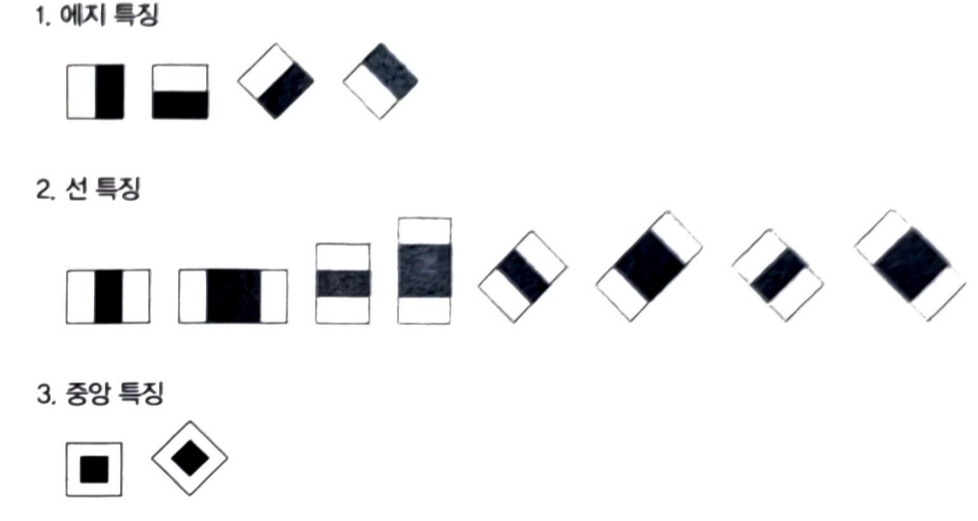

하르 캐스케이드 특징은 흰색과 검은색의 직사각형 영역으로 구성  
일부 커널은 수평, 수직 방향의 픽셀 강도 변화 포착  
다른 커널은 대각선 방향의 픽셀 강도 포착  
다양한 사이즈와 모양의 하르 캐스케이드 특징으로 다양한 특성 포착

### 하르 캐스케이드 특징의 스케일과 위치
이미지 내의 객체 탐지는 객체의 사이즈, 모양, 위치에 따라 달라짐  
탐지 알고리즘은 이것들 모두 고려해야함 -> 하르 캐스케이드 특징은 다양한 위치와 사이즈로 스캔  

- 이미지 스케일링 : 원본 이미지를 다양한 사이즈로 재조정, 여러 이미지 세트 생성  
- 특징 스케일링 : 하르 캐스케이드 특징 자체의 사이즈를 조절 -> 특정 사이즈의 특정 패턴 탐지  

- 슬라이딩 윈도우 : 이미지 전체를 횡단하며 지정된 사이즈의 윈도우를 슬라이드  
각 윈도우 위치에서 하르 캐스케이드 특징 추출  
- 스트라이드 : 슬라이딩 윈도우를 얼마나 빠르게 이동시킬 것인지  
작은 값일수록 더 높은 해상도 탐지, 계산 비용 증가


## 에이다부스트

- 앙상블 : 여러 개의 모델을 조합하여 하나의 강력한 모델을 생성  
여러 개의 개별 모델의 예측을 결합함으로써 전체의 모델 정확도와 안정성을 향상  
- 부스팅 : 앙상블 기법 중 하나  
여러 개의 개별 모델을 결합하여 하나의 성능이 높은 모델 생성


### 데이터 샘플과 가중치 초기화
학습 데이터 세트의 모든 데이터 샘플에 동일한 가중치를 할당 (데이터 샘플 : 학습 데이터 세트의 각 개별 데이터 포인트)  
가중치 $w_i = \frac {1}{N}$  
아직 어떤 샘플이 알고리즘에 도움이 되는지 알 수 없기 때문에 동일한 가중치

### 반복적인 학습
- 약한 학습기 (weak learner) : 단순한 학습 모델  
학습 데이터 세트의 일부분에서만 잘 동작할 수 있음  

각 반복마다 약한 학습기는 현재의 가중치가 부여된 학습 데이터 세트에 적용  
샘플의 가중치를 고려하여 학습되므로 이전 반복에서 잘못 분류된 샘플에 더 집중  
학습된 약한 학습기의 성능을 평가하며, 오차를 기반으로 학습기 자체에 가중리를 부여  
$\epsilon = \frac{\sum_{i=1}^{N} w_i \text{error}(i)}{\sum_{i=1}^{N} w_i}$  
- $\epsilon$ : 약한 학습기의 가중치 오차
- $\text{error}(i)$ : $i$번째 샘플에 대한 예측 오차 (올바르면 0, 아니면 1)  
<br>  

학습기의 오차는 각 샘플의 가중치와 예측 오차로 계산  
작 동작하는 학습기는 더 높은 가중치  
$\alpha = \frac{1}{2}\log\left(\frac{1 - \epsilon}{\epsilon}\right)$  
- $\alpha$ : 학습기의 가중치  

잘 작동될수록 ($\epsilon$이 작을수록) $\alpha$값이 커진다  
-> 해당 학습기가 최종 모델에서 더 큰 역할  
<br>  

샘플의 가중치는 현재의 약한 학습기에 의해 올바르게 분류되었는지 여부에 따라 업데이터  
잘못 분류된건 가중치 증가, 올바른건 가중치 감소  
$w_{i} = w_{i} \times \exp(-\alpha \times y_{i} \times h(x_{i}))$  
- $y_i$ : $i$번째 샘플의 실제 레이블
- $h(x_{i})$ : $i$번째 샘플에 대한 학습기의 예측 값

### 결합  
모든 약한 학습기를 결합하여 강한 학습기를 생서  
각 학습기의 결정은 그에 부여된 가중치에 따라 결정  
$F(x) = \sum_{t=1}^{T} \alpha_{t}h_{t}(x)$  
- $F(x)$ : 최종 모델의 예측
- $T$ : 전체 학습기의 수

## OpenCV를 활용한 하르 캐스케이드 구현 실습

In [34]:
import cv2
import matplotlib.pyplot as plt

In [36]:
!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg

--2025-11-04 04:44:38--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.01s   

2025-11-04 04:44:39 (11.3 MB/s) - ‘three young man.jpg’ saved [146736/146736]



In [37]:
# 이미지 로드
image_path = "/content/three young man.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [38]:
# 하르 캐스케이드 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


detectMultiScale : 그레이 스케일 이미지에서 얼굴을 탐지

In [39]:
# 얼굴 탐지
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print(faces)

[[449 111 173 173]
 [721 106 170 170]
 [159 148 160 160]
 [371 376 116 116]]


탐지된 얼굴의 위치(x, y)와 사이즈(width, height) 반환

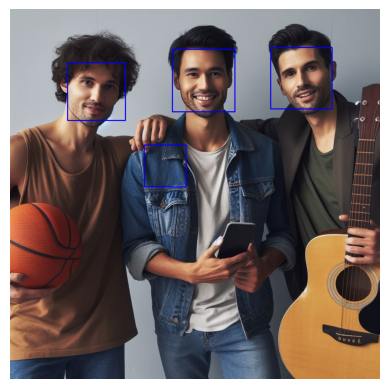

In [41]:
# 탐지된 얼굴에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 결과 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 숨기기
plt.show()

# 3.2.3 스타일 전이
색감이나 밝기를 조절하여 이미지의 스타일을 변환

## 스타일 전이란?  
한 이미지의 스타일을 다른 이미지에 전이  

- 콘텐츠 표현 : 이미지의 기본적인 형태와 객체를 의미  
그림 속의 산, 건물, 사람 등 주된 객체나 특성  
- 스타일 표현 : 색상의 조합, 붓질, 텍스처 등

## VAE를 활용한 잠재 벡터 추출
딥러닝 모델은 숫자 집합에서 패턴과 특징을 추출해낼 수 있기에 이미지를 해석, 구분 가능

### 이미지 생성 모델의 구현 가능성

- 잠재 벡터 : 특징을 표현하는 벡터  

잠재적으로 사람이 이미지를 보고 느낀 특징을 표현할 수 있는 벡터들이 있고  
여기에 원하는 이미지를 생성하는 것이 학습될 수 있다면  
인공지능 모델 구현 가능 -> VAE(Variational AutoEncoder)  

VAE의 목적은 '원하는 특징을 가진 이미지를 만들어낼 수 있는가?'  
- $z$ : 잠재 벡터
- $\theta$ : 이미지를 만들어주는 디코더 모델
- $p_{\theta}$ : 모델에 따른 확률 분포
- $x$ : 실제 생성해내고 싶은 이미지 데이터 세트의 분포
- $p_{\theta}(x,z)$ : $x$, $z$의 동시 등장 확률 분포  
- 우리는 모델 $\theta$와 잠재벡터 $z$을 찾아내야함  

$p_{\theta}(x, z) = p_{\theta}(z)p_{\theta}(x|z) = p_{\theta}(x)p_{\theta}(z|x)$  

전체 데이터 분포 $X$을 알아낼 수 없기에 $p_{\theta}(X)$도 알아낼 수 없다  
-> 원하는 이미지 $x$를 만들기 위한 $p_{\theta}(z|x)$도 쉽게 얻기 힘들다  

$q_{\phi}(z|x) \approx p_{\theta}(z|x)$  
모델 $\phi$를 하나 더 구성하여 근사기법을 통해 이미지 $x$의 특성을 잘 표현하는 이상적인 잠재 벡터 $z$를 찾아준다면  
우리가 원하는 이미지의 특성을 조절하여 이미지를 변화시켜 볼 수 있다

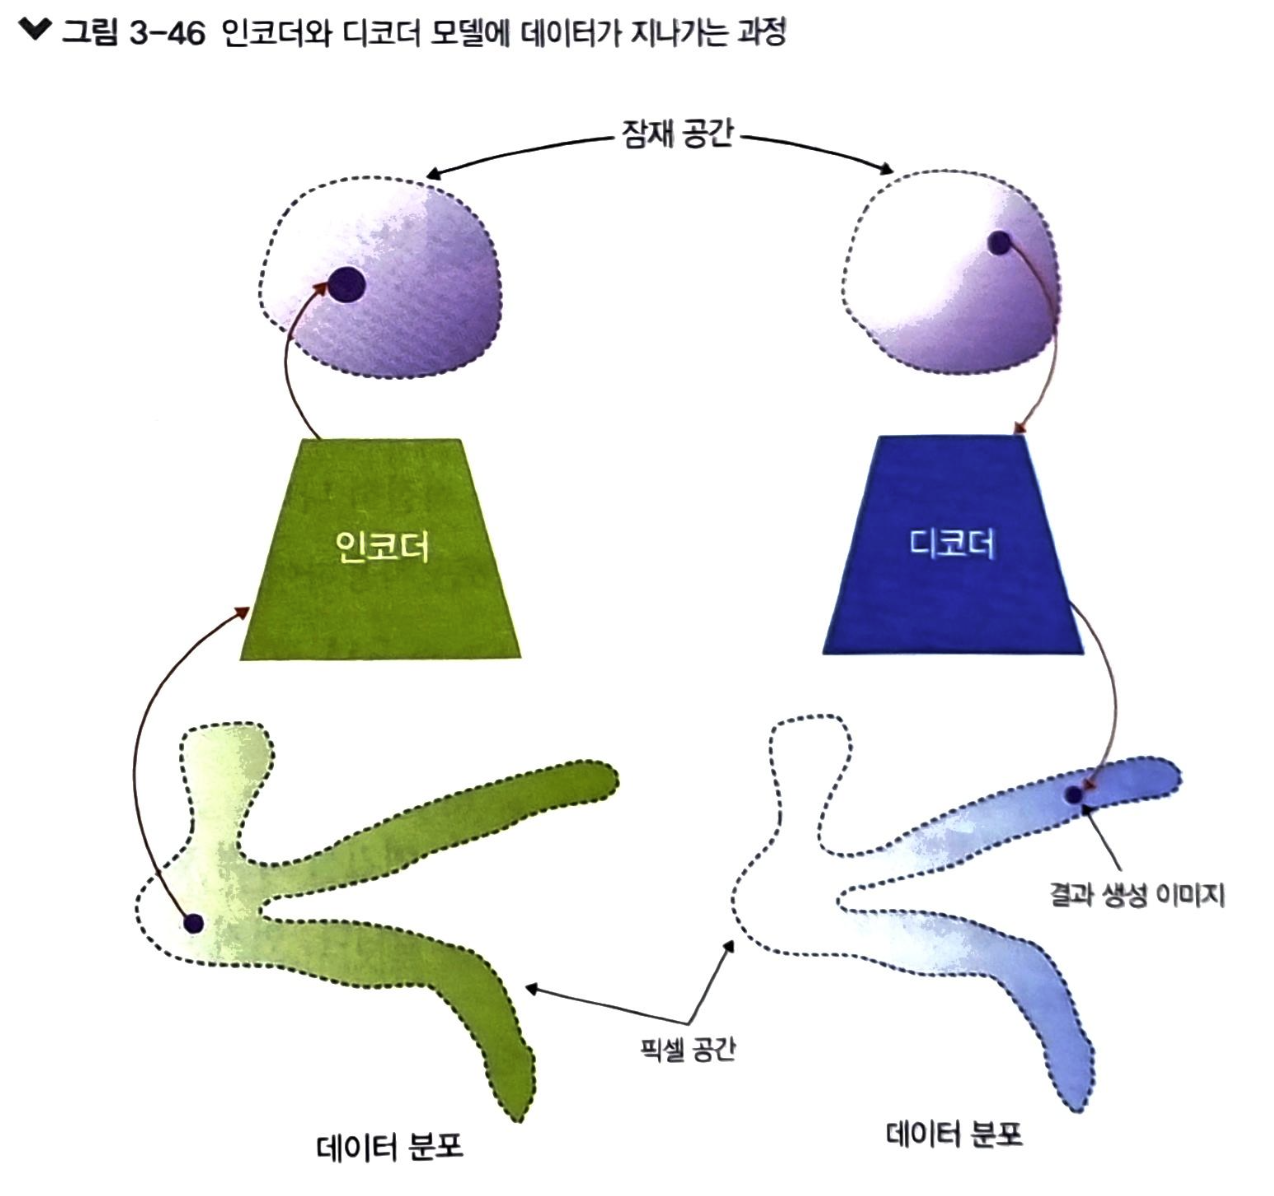

그러나 픽셀의 집합인 이미지에선 같은 특성도 크게 다르게 나타나기도 한다  
따라서 적절한 모델 $\phi$가 학습되기 어렵다  

- 변분 참조 트릭 (variational inference)  
모델 $\phi$가 만들어낸 결과 값을 참조해서 잠재 벡터 $z$를 랜덤 추출  

$(\mu, \log \sigma) = \text{EncoderNeuralNet}_{\phi}(x)$  
$q_{\phi}(z|x) = N(z; \mu, \text{diag}(\sigma))$  
이렇게 한번 랜덤 추출된 벡터는 모델이 데이터의 특성을 좀 더 잘 학습할 수 있도록 도와줌

 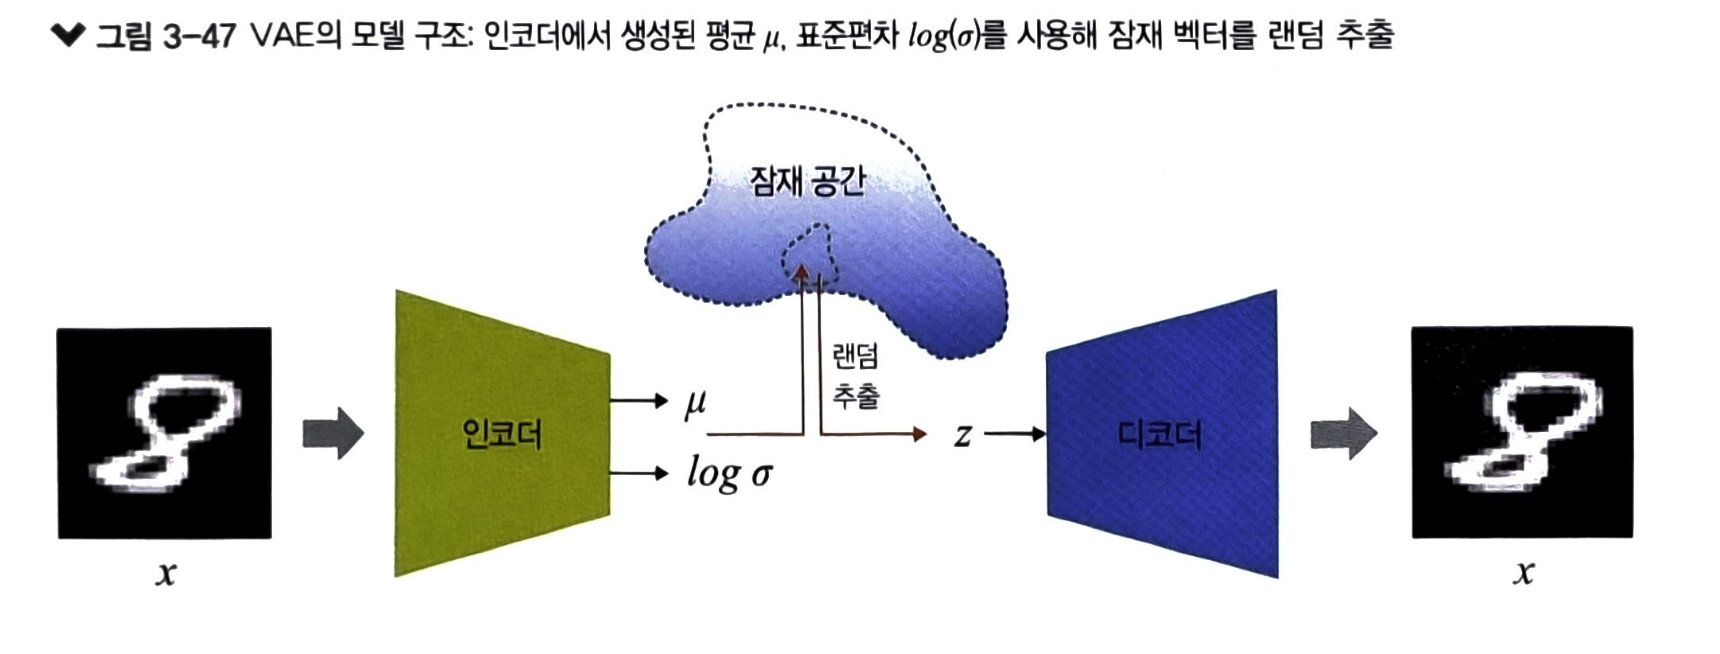

이렇게 만들어진 VAE는 오토 인코더와 매우 유사한 구조  
<br>  
이러한 구조에서 학습이 진행되면  
이미지의 스타일을 적절히 나타낼 수 있는 잠재 벡터 $z$의 잠재 공간이 도출되며  
학습을 마친 후에는 디코더 모델 $\theta$만 사용하여  
변하는 잠재 벡터 $z$에 따라 변화하는 이미지를 확인해볼 수 있다

### 모델 학습을 위한 목적 함수 설계
- 목적 함수 : 모델 학습 과정에서 역전파를 하기 위한 함수, 손실 함수  

$p_{\theta}(x) = \int p_{\theta}(z)p_{\theta}(x|z)dz$  
<br>  
그러나 비선형 함수는 적분 불가능한 경우가 많다  
따라서 각각의 확률 분포가 독립 항등 분포(i.i.d.)임을 가정하고  
각각 확률 값을 모두 곱한 연산을 기준으로 수식 전개  

$\log p_{\theta}(x)$ ------①  
$= \log(p_{\theta}(x, z) - \log p_{\theta}(x|z))$ ------②  
$= E_{q_{\phi}(z|x)}[\log q_{\phi}(z|x) - \log p_{\theta}(x|z)] + E_{q_{\phi}(z|x)}[-\log q_{\phi}(z|x) + \log p_{\theta}(x, z)]$ ------③  
<br>
수식 ① : 베이즈 정리를 $log$로 정리  
<br>
수식 ② : 쿨백-라이블러 발산, 이상적인 확률 분포와 이를 근사하기 위한 확률 분포의 차이를 구함  
이것은 항상 값이 0보다 크고, 해당 값이 0에 가까운 상황이 이상적  
$\log p_{\theta}(x) \geq L(\theta, \phi; x) = E_{q_{\phi}(z|x)}[-\log q_{\phi}(z|x) + \log p_{\theta}(x, z)]$  
<br>
수식 ③ : ELBO(Evidence of Lower BOund), 목적 함수 $L(\theta, \phi; x)$을 최대화
$\log p_{\theta}(x) = D_{KL}(q_{\phi}(z|x)||p_{\theta}(z|x)) + L(\theta, \phi; x)$  
$L(\theta, \phi; x) = -D_{KL}(q_{\phi}(z|x)||p_{\theta}(z)) + E_{q_{\phi}(z|x)}\log p_{\theta}(x|z)$



## 텐서플로를 활용한 VAE 모델 구현 및 학습

In [42]:
from IPython import display
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import time

### 데이터 세트 준비  
MNIST

In [43]:
# 데이터 세트 준비
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

def preprocess_images(images):
    images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
    return np.where(images > .5, 1.0, 0.0).astype('float32') #노이즈 제거

train_images = preprocess_images(train_images)

train_shuffle = 60000
batch_size = 128

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_shuffle).batch(batch_size))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 모델 구현
`tf.keras.Model`을 상속하여 모델을 구현  
인코더와 디코더 부분을 따로 정의해 원본 이미지를 재생성  
다층 퍼셉트론에 해당하는 밀집층으로 2개 층씩 통과시켜 얻어진 벡터를 다시 밀집층 하나를 통과시켜 벡터를 얻는 과정을 거침  
$(\mu, \log \sigma) = \text{EncoderNeuralNet}_{\phi}(x)$  
그렇게 마지막으로 거쳐 나온 Dense 층에는 활성화 함수를 통과시키지 않고 값을 얻어 $\mu$(mean)와 $\log \sigma$(logvar)의 값으로 사용하게 됨  
그 후에 각각 sample, encode, reparameterize, decode 메서드를 만듬

In [44]:
# 모델 구현
class VAE(tf.keras.Model): #tf.keras.Model을 상속해서 새로운 모델 클래스 생성
    """Variational Autoencoder."""

    def __init__(self, latent_dim): #잠재공간 차원 latent_dim을 받아 내부에 저장
        super(VAE, self).__init__() #모델 인식
        self.latent_dim = latent_dim #잠재공간 차원을 인스턴스 변수로 저장

        #인코더 네트워크 생성, mean과 logvar을 추출
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(512, activation='relu'),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim), #앞의 latent_dim은 평균, 뒤의 latent_dim은 logvar
            ]
        )

        #디코더 네트워크 생성, 잠재벡터 z를 받아서 다시 28x28 이미지로 복원
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(512, activation='relu'),
                # No activation
                tf.keras.layers.Dense(28*28*1), #이미지 픽셀 하나하나에 대한 로짓
                tf.keras.layers.Reshape(target_shape=(28, 28, 1)), #1차원 벡터를 이미지 모양으로 되돌림
            ]
        )

    @tf.function #그래프 모드로 빠르게 실행됨
    def sample(self, eps=None):
        """잠재공간에서 샘플을 뽑아 이미지로 디코딩할때 사용"""
        if eps is None: #외부에서 잠재벡터를 안줬다면
            eps = tf.random.normal(shape=(100, self.latent_dim)) #latent_dim모양의 랜덤 벡터 100개 생성
        return self.decode(eps, apply_sigmoid=True) #아래의 디코드 함수, 마지막에 시그모이드 적용

    def encode(self, x):
        """입력 이미지 x를 받아서 인코더를 적용하여 평균과 로그분산 logvar을 추출함"""
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1) #2*latent_dim인 벡터를 2등분
        return mean, logvar

    def reparameterize(self, mean, logvar):
        """
        reparameterization trick
        μ, log σ 값들을 받아 랜덤 변수 생성
        """
        eps = tf.random.normal(shape=mean.shape) #평균과 같은 모양의 표준정규분포 노이즈 생성 - 역전파를 위해
        return eps * tf.exp(logvar * .5) + mean #z = ε*σ + μ

    def decode(self, z, apply_sigmoid=False):
        """잠재벡터 z를 박아 이미지를 복원하는 함수"""
        logits = self.decoder(z) #디코더를 통과시켜 로짓을 얻음
        if apply_sigmoid: #시그모이드 적용하고 싶으면 (실제 이미지처럼 보고싶으면)
            probs = tf.sigmoid(logits)
            return probs
        return logits #손실 계산용

모델 학습 코드

In [46]:
optimizer = tf.keras.optimizers.Adam(4e-4) #Adam 옵티마이저


def log_normal_pdf(sample, mean, logvar, raxis=1):
    "정규분포의 로그 확률밀도 계산"
    log2pi = tf.math.log(2. * np.pi) #log(2π) 미리 계산
    return tf.reduce_sum( #각 차원의 로그 확률을 합침
        -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi), #정규분포의 로그 확률 식을 그대로 구현
        axis=raxis)


def compute_loss(model, x):
    "입력 이미지 x에 대한 전체 VAE 손실을 계산"
    mean, logvar = model.encode(x) #인코더로부터 평균과 로그 분산을 얻음
    z = model.reparameterize(mean, logvar) #평균과 로그분산으로부터 샘플 z를 reparameterization trick으로 만든다
    x_logit = model.decode(z) #디코더를 통해 z를 복원하여 이미지의 로짓을 얻는다 (시그모이드 전 단계)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x) #입력 이미지 x와 복원된 로짓 x_logit 사이의 픽셀 단위 교차 엔트로피를 계산
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3]) #교차 엔트로피는 음의 로그 우도이므로 부호를 반대로, 각 픽셀에 대해 더해줌
    logpz = log_normal_pdf(z, 0., 0.) #사전분포 p(z)는 N(0,1)이라 가정
    logqz_x = log_normal_pdf(z, mean, logvar) #인코더가 근사한 사후확률 q(z|x)의 로그 확률을 계산
    return -tf.reduce_mean(logpx_z + logpz - logqz_x) #VAE의 ELBO를 손실로 사용, 음수 변환하여 최소화로 진행

@tf.function
def train_step(model, x, optimizer): #한 batch의 학습을 수행
    with tf.GradientTape() as tape: #GradientTape 블록 안에서 손실을 계산하면
        loss = compute_loss(model, x) #케라스가 자동으로 미분 그래프를 기록
    gradients = tape.gradient(loss, model.trainable_variables) #손실을 모델의 모든 학습 가능한 변수에 대해 미분하여 기울기를 구함
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) #구한 기울기를 옵티마이저에 전달해 가중치 업데이트

### 모델 학습

In [47]:
epochs = 50
# 2차원 잠재 백터를 준비합니다.
latent_dim = 2
num_examples_to_generate = 25

# 생성(예측)을 위해 랜덤 벡터를 일정하게 유지하여
# 개선 사항을 더 쉽게 볼 수 있습니다.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = VAE(latent_dim)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


학습 중간에 진행 사항을 확인하기 위한 함수와 데이터를 정해서 사용

In [48]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [49]:
# 학습 중간에 확인할 데이터를 정해줍니다.
assert batch_size >= num_examples_to_generate
for test_batch in train_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

중간중간 시각화된 결과가 어떻게 숫자로 변해가는지 확인

Epoch: 50, ELBO: -131.1551055908203, time elapse for current epoch: 1.6680378913879395


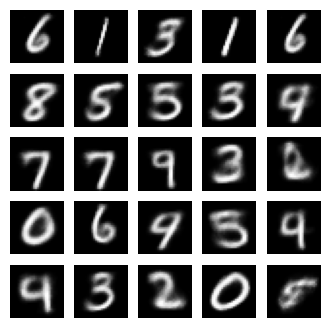

In [50]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
        train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for test_x in train_dataset:
        loss(compute_loss(model, test_x))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, ELBO: {}, time elapse for current epoch: {}'
          .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

2차원 잠재 공간의 벡터로부터 숫자가 어떻게 생성되는지 확인

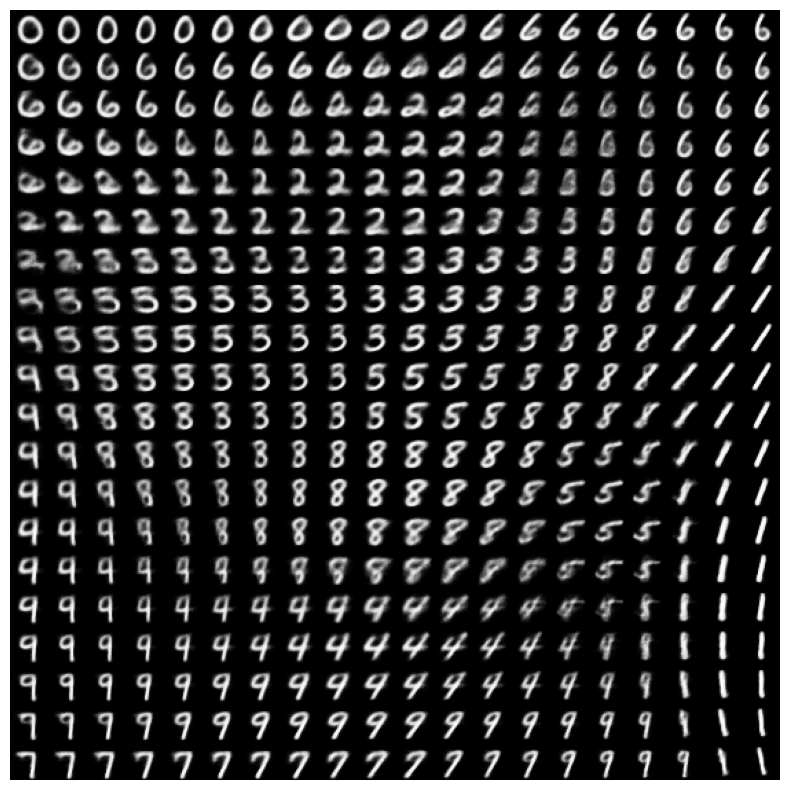

In [51]:
# 2차원 잠재 공간의 벡터로부터 숫자가 어떻게 생성되는지 확인하기
def plot_latent_images(model, n, digit_size=28):
    """Plots n x n digit images decoded from the latent space."""

    norm = tfp.distributions.Normal(0, 1)
    grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
    grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
    image_width = digit_size*n
    image_height = image_width
    image = np.zeros((image_height, image_width))

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z = np.array([[xi, yi]])
            x_decoded = model.sample(z)
            digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
            image[i * digit_size: (i + 1) * digit_size,
                  j * digit_size: (j + 1) * digit_size] = digit.numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='Greys_r')
    plt.axis('Off')
    plt.show()

plot_latent_images(model, 20)

잠재 벡터가 변화함에 따라 생성되는 이미지도 연속적으로 변함

## 콘텐츠 표현과 스타일 표현의 추출
콘텐츠 표현은 이미지의 기본적인 구조와 형태를 표현하며, 일반적으로 합성곱 신경망의 중간 층에서 추출됨  
중간 층은 상대적으로 원본 이미지에 가깝기 때문에 이미지의 기본적인 구조를 잘 표현해냄  
<br>
스타일 표현은 일반적을 합성곱 신경망의 여러 층에서 추출된 특징 맵을 사용하여 계산  
각 층에서의 특징 맵을 이용해 Gram Matrix(스타일 행렬)를 계산하고 이를 통해 이미지의 텍스처와 패턴을 표현